<a href="https://colab.research.google.com/github/impratiksingh/Analyzing-Visualizing-Data-Excel/blob/master/Part_1_Tensors_in_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Single Neuron Network**

In [0]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision


In [0]:
!wget -c https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py

--2018-12-04 15:08:30--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 416 Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [0]:
import torch

In [0]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch

In [0]:
def activation(x):
  return 1/(1+torch.exp(-x))

In [0]:
# Generate data
torch.manual_seed(7)
features=torch.randn((1,5))
weights=torch.randn_like(features) 
bias=torch.randn((1,1))

In [0]:
print(features)
print(weights)
print(bias)

tensor([[-0.1468,  0.7861,  0.9468, -1.1143,  1.6908]])
tensor([[-0.8948, -0.3556,  1.2324,  0.1382, -1.6822]])
tensor([[0.3177]])


In [0]:
## Calculate the output of this network using the weights and bias tensors
X_theta=torch.mm(features,weights.t())
# another method : activation(torch.sum(features*weights)+bias)
# another method : activation((features*weights).sum()+bias)
y=activation(X_theta+bias)
y

tensor([[0.1595]])

In [0]:
weights.shape

torch.Size([1, 5])

In [0]:
## Calculate the output of this network using matrix multiplication
# Did it already , but will try different approach here
y=activation(torch.mm(features,weights.view(5,1)) + bias)
y

tensor([[0.1595]])

**Multi Layer Neural Network**

In [0]:
# Generate some Data
torch.manual_seed(7)

# Features are 3 random normal variables
features=torch.randn((1,3))

# Define size of each layer in the network
n_input = features.shape[1]
n_hidden=2
n_output=1

W1=torch.randn(n_input,n_hidden)
W2=torch.randn(n_hidden,n_output)

B1=torch.randn(1,n_hidden)
B2=torch.randn(1, n_output)

In [0]:
# Shapes
print('Feature Shape:' , features.shape )
print('W1 Shape:' , W1.shape )
print('W2 Shape:' ,W2.shape )
print('B1:' ,B1.shape )
print('B2:' ,B2.shape )

Feature Shape: torch.Size([1, 3])
W1 Shape: torch.Size([3, 2])
W2 Shape: torch.Size([2, 1])
B1: torch.Size([1, 2])
B2: torch.Size([1, 1])


In [0]:
# Calculate the output for this multi-layer network using the weights W1 & W2, and the biases, B1 & B2
h=activation(torch.mm(features,W1)+B1)
y=activation(torch.mm(h,W2)+B2)
y

tensor([[0.3171]])

**Numpy to Torch and back**

In [0]:
import numpy as np
a=np.random.rand(4,1)
a

array([[0.7249695 ],
       [0.58941948],
       [0.30245416],
       [0.93078839]])

In [0]:
b=torch.from_numpy(a)
b

tensor([[0.7250],
        [0.5894],
        [0.3025],
        [0.9308]], dtype=torch.float64)

In [0]:
c=b.numpy()
c

array([[0.7249695 ],
       [0.58941948],
       [0.30245416],
       [0.93078839]])

In [0]:
# Memory is shared , hence in place operation changed both tensor and numpy array
b.mul_(2)


tensor([[1.4499],
        [1.1788],
        [0.6049],
        [1.8616]], dtype=torch.float64)

In [0]:
a

array([[1.44993901],
       [1.17883896],
       [0.60490832],
       [1.86157677]])

In [0]:
c

array([[1.44993901],
       [1.17883896],
       [0.60490832],
       [1.86157677]])

**Neural Networks with PyTorch**

In [0]:
#!pip install helper

In [0]:
# Import Packages
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

# !pip install helper
import helper

import matplotlib.pyplot as plt

In [0]:
### Run this cell

from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [0]:
dataiter=iter(trainloader)
images,labels=dataiter.next()
print(type(images))
print(type(labels))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


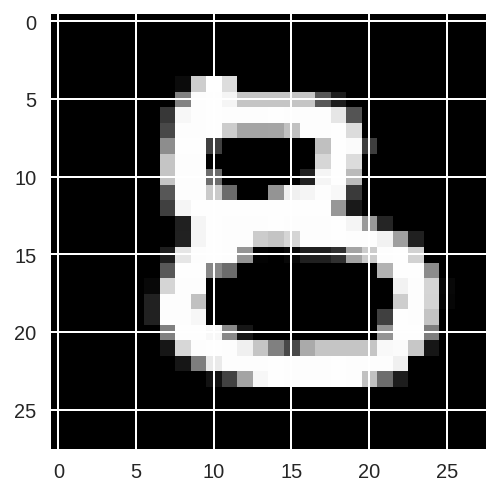

In [0]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');


In [0]:
n_inputs=784
n_hidden=256
n_output=10
features=images.view(images.shape[0],-1) # We could have written (64,784) but -1 , gives pytorch to calculate the remaining space and derive value by itself
W1=torch.randn(n_inputs,n_hidden)
W2=torch.randn(n_hidden,n_output)
B1=torch.randn(1,n_hidden)  
B2=torch.randn(1,n_output) # This can be written as torch.randn(10) so whats the difference between tensor and matrix.

h=activation(torch.mm(features,W1)+B1)
out=activation(torch.mm(h,W2)+B2)
out.shape


torch.Size([64, 10])

In [0]:
# p=torch.randn(4)
# q=torch.randn(1,4)
# torch.mm(p,q)
# differece between 2d tensor and 2d matrix

In [0]:
# RuntimeError: "exp" not implemented for 'torch.LongTensor' , when dtype is not defined
# p=torch.tensor([0,1],dtype=torch.double)
# torch.exp(p)

In [0]:
def softmax(x):
    ## TODO: Implement the softmax function here
    n=torch.exp(x)
    d=torch.exp(x).sum(dim=1).view(64,-1)
    return n/d
# Here, out should be the output of the network in the previous excercise with shape (64,10)
probabilities = softmax(out)

# Does it have the right shape? Should be (64, 10)
print(probabilities.shape)
# Does it sum to 1?
print(probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


**Building networks with PyTorch**

In [0]:
from torch import nn

In [0]:
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    self.hidden=nn.Linear(784,256)
    self.output=nn.Linear(256,10)
    
    self.sigmoid=nn.Sigmoid()
    self.softmax=nn.Softmax(dim=1)
    
  def forward(self, x):
    x=self.hidden(x)
    x=self.sigmoid(x)
    x=self.output(x)
    x=self.softmax(x)
    
    return x
  

In [0]:
model=Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax()
)

In [0]:
# A Precise way of writing
import torch.nn.functional as F
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    self.hidden=nn.Linear(784,256)
    self.output=nn.Linear(256,10)
    
    
    
  def forward(self, x):
    x=F.sigmoid(self.hidden(x))
    x=F.softmax(self.output(x))
    
    return x
  


In [0]:
model=Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
)

**Exercise: Create a network with 784 input units, a hidden layer with 128 units and a ReLU activation, then a hidden layer with 64 units and a ReLU activation, and finally an output layer with a softmax activation as shown above. You can use a ReLU activation with the nn.ReLU module or F.relu function.**

In [0]:
class ReluNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    
    self.hidden1=nn.Linear(784,128)
    self.hidden2=nn.Linear(128,64)
    self.output=nn.Linear(64,10)
    
    
    
  def forward(self,x):
    x=F.relu(self.hidden1(x))
    x=F.relu(self.hidden2(x))
    x=F.softmax(self.output(x),dim=1)
    
    return x
  
model=ReluNetwork()
model   

ReluNetwork(
  (hidden1): Linear(in_features=784, out_features=128, bias=True)
  (hidden2): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
)

In [0]:
# Customising the automatically initialized weights and biases
print(model.hidden1.bias)
print(model.hidden1.weight)

# modify the bias to 0 , in place modification
model.hidden1.bias.data.fill_(0)

Parameter containing:
tensor([-0.0055, -0.0025, -0.0040,  0.0211, -0.0023,  0.0197, -0.0098,  0.0086,
         0.0153,  0.0127, -0.0080, -0.0018,  0.0310,  0.0209, -0.0279,  0.0038,
         0.0211, -0.0280, -0.0354, -0.0346,  0.0077,  0.0270,  0.0150, -0.0330,
         0.0125,  0.0229, -0.0355, -0.0016,  0.0294,  0.0053,  0.0350,  0.0210,
         0.0011,  0.0176,  0.0002, -0.0127, -0.0130, -0.0164, -0.0134, -0.0212,
        -0.0277,  0.0214,  0.0184,  0.0059, -0.0313, -0.0188,  0.0225,  0.0299,
         0.0299,  0.0047, -0.0238, -0.0196,  0.0241,  0.0200, -0.0347, -0.0111,
         0.0093, -0.0025, -0.0106,  0.0144,  0.0206, -0.0061,  0.0274, -0.0055,
        -0.0128, -0.0354,  0.0009,  0.0235,  0.0074, -0.0114, -0.0300, -0.0162,
         0.0109,  0.0064,  0.0137,  0.0116,  0.0147,  0.0229,  0.0002, -0.0051,
         0.0008, -0.0148, -0.0055, -0.0066,  0.0146, -0.0197,  0.0296, -0.0122,
        -0.0259, -0.0357, -0.0261,  0.0071, -0.0005, -0.0032, -0.0273,  0.0274,
         0.0201,  

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.])

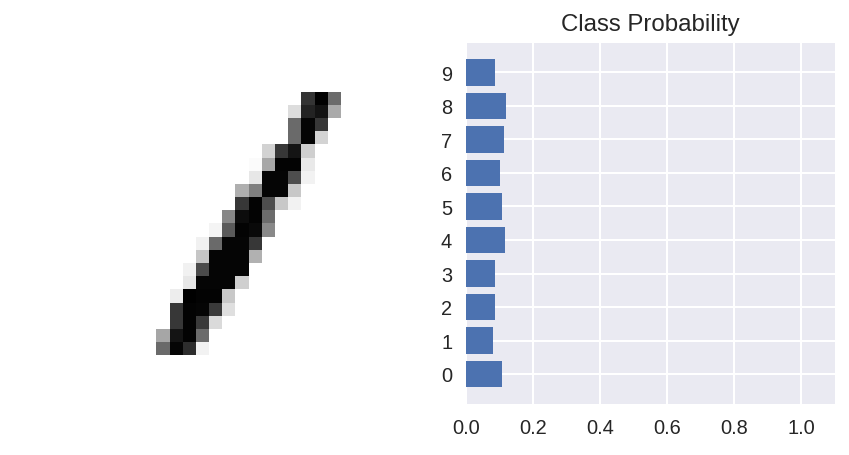

In [0]:
# Forward Pass
# Now we  have the network , we now see , what happens when we pass
# Grab the data 
dataiter=iter(trainloader)
images,lables=dataiter.next()
images.resize_(64,1,784)
img_idx=0
ps=model.forward(images[img_idx,:])
img=images[img_idx]
helper.view_classify(img.view(1,28,28),ps)

**Using nn.Sequential**

A convenient way to build network , where a network is passed sequentially through operations




In [0]:
input_size=784;
hidden_sizes=[128,64]
output_size=10

# Build a feed Forward Network
model=nn.Sequential(nn.Linear(input_size,hidden_sizes[0]),
                   nn.ReLU(),
                   nn.Linear(hidden_sizes[0],hidden_sizes[1]),
                   nn.ReLU(),
                   nn.Linear(hidden_sizes[1],output_size),
                   nn.Softmax(dim=1))
print(model)
                    



Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax()
)


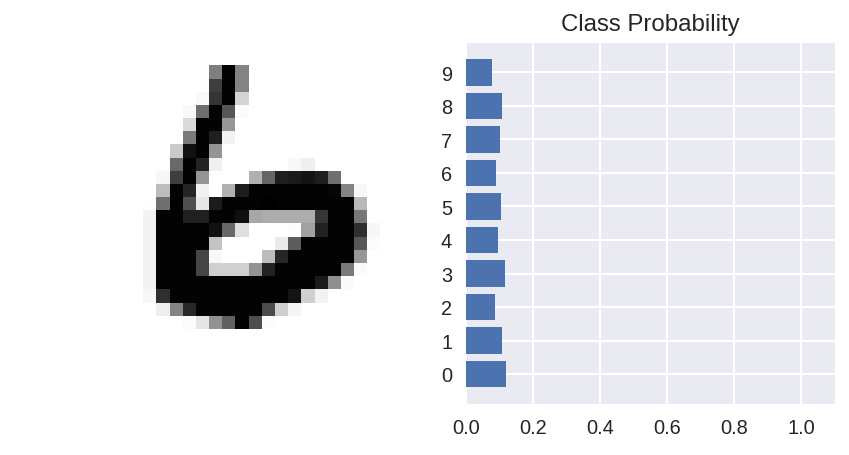

In [0]:
# Forward pass through the network and display the output
images, labels=next(iter(trainloader))
images.resize_(images.shape[0],1,784)
ps=model.forward(images[0,:])
helper.view_classify(images[0].view(1,28,28),ps)

In [0]:
print(model[0])
print(model[0].weight)

Linear(in_features=784, out_features=128, bias=True)
Parameter containing:
tensor([[-0.0003,  0.0092,  0.0179,  ...,  0.0338, -0.0121,  0.0168],
        [-0.0023, -0.0218, -0.0087,  ..., -0.0076,  0.0301,  0.0228],
        [-0.0023,  0.0242, -0.0152,  ..., -0.0067,  0.0055, -0.0151],
        ...,
        [-0.0272, -0.0105, -0.0148,  ...,  0.0160,  0.0097,  0.0348],
        [-0.0000, -0.0195,  0.0124,  ..., -0.0323,  0.0258, -0.0325],
        [ 0.0203, -0.0347, -0.0327,  ..., -0.0324,  0.0030, -0.0327]],
       requires_grad=True)


**Loss in Pytorch**

In [0]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [0]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10))

# Define the loss
criterion = nn.CrossEntropyLoss()

# Get our data
images, labels = next(iter(trainloader))
# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass, get our logits
logits = model(images)
# Calculate the loss with the logits and the labels
loss = criterion(logits, labels)

print(loss)

tensor(2.3233, grad_fn=<NllLossBackward>)


Exercise: Build a model that returns the log-softmax as the output and calculate the loss using the negative log likelihood loss. Note that for nn.LogSoftmax and F.log_softmax you'll need to set the dim keyword argument appropriately. dim=0 calculates softmax across the rows, so each column sums to 1, while dim=1 calculates across the columns so each row sums to 1. Think about what you want the output to be and choose dim appropriately.

In [0]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

# Define the loss
criterion = nn.NLLLoss()

# Get our data
images, labels = next(iter(trainloader))
# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass, get our logits
logits = model(images)
# Calculate the loss with the logits and the labels
loss = criterion(logits, labels)

print(loss)

tensor(2.3134, grad_fn=<NllLossBackward>)


**Autograd**

In [0]:
x=torch.randn(2,2,requires_grad=True)
print(x)

tensor([[ 0.3746, -0.5946],
        [ 1.6155,  0.7241]], requires_grad=True)


In [0]:
y=x**2
print(y)

tensor([[0.1404, 0.3535],
        [2.6099, 0.5243]], grad_fn=<PowBackward0>)


In [0]:
print(y.grad_fn)

In [0]:
z=y.mean()
z

tensor(0.9070, grad_fn=<MeanBackward1>)

In [0]:
print(x.grad)

None


In [0]:
z.backward()
print(x.grad)
print(x/2)

tensor([[ 0.1873, -0.2973],
        [ 0.8078,  0.3620]])
tensor([[ 0.1873, -0.2973],
        [ 0.8078,  0.3620]], grad_fn=<DivBackward0>)


**Loss and Autograd together**

In [0]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logits = model(images)
loss = criterion(logits, labels)

In [0]:
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 0.0002,  0.0002,  0.0002,  ...,  0.0002,  0.0002,  0.0002],
        [ 0.0014,  0.0014,  0.0014,  ...,  0.0014,  0.0014,  0.0014],
        [-0.0001, -0.0001, -0.0001,  ..., -0.0001, -0.0001, -0.0001],
        ...,
        [ 0.0021,  0.0021,  0.0021,  ...,  0.0021,  0.0021,  0.0021],
        [ 0.0011,  0.0011,  0.0011,  ...,  0.0011,  0.0011,  0.0011],
        [-0.0002, -0.0002, -0.0002,  ..., -0.0002, -0.0002, -0.0002]])


**Training the network!**

In [0]:
from torch import optim

# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [0]:
print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model.forward(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[ 0.0238,  0.0077, -0.0350,  ...,  0.0015, -0.0222, -0.0184],
        [ 0.0027, -0.0000,  0.0091,  ..., -0.0321,  0.0040,  0.0083],
        [ 0.0205, -0.0091, -0.0183,  ..., -0.0141, -0.0218,  0.0306],
        ...,
        [-0.0329,  0.0270, -0.0075,  ..., -0.0110, -0.0060,  0.0344],
        [-0.0355,  0.0328,  0.0218,  ..., -0.0343,  0.0312,  0.0318],
        [-0.0091, -0.0139, -0.0021,  ..., -0.0149, -0.0205,  0.0125]],
       requires_grad=True)
Gradient - tensor([[-0.0012, -0.0012, -0.0012,  ..., -0.0012, -0.0012, -0.0012],
        [ 0.0014,  0.0014,  0.0014,  ...,  0.0014,  0.0014,  0.0014],
        [-0.0001, -0.0001, -0.0001,  ..., -0.0001, -0.0001, -0.0001],
        ...,
        [ 0.0014,  0.0014,  0.0014,  ...,  0.0014,  0.0014,  0.0014],
        [ 0.0015,  0.0015,  0.0015,  ...,  0.0015,  0.0015,  0.0015],
        [-0.0037, -0.0037, -0.0037,  ..., -0.0037, -0.0037, -0.0037]])


In [0]:
# Take an update step and few the new weights
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[ 0.0238,  0.0077, -0.0350,  ...,  0.0015, -0.0222, -0.0184],
        [ 0.0027, -0.0000,  0.0091,  ..., -0.0321,  0.0040,  0.0083],
        [ 0.0205, -0.0091, -0.0183,  ..., -0.0141, -0.0218,  0.0306],
        ...,
        [-0.0329,  0.0270, -0.0075,  ..., -0.0111, -0.0060,  0.0344],
        [-0.0355,  0.0328,  0.0217,  ..., -0.0344,  0.0312,  0.0318],
        [-0.0091, -0.0139, -0.0021,  ..., -0.0149, -0.0205,  0.0125]],
       requires_grad=True)


**Exercise: Implement the training pass for our network. If you implemented it correctly, you should see the training loss drop with each epoch.**

In [0]:
## Your solution here
from torch import optim
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # TODO: Training pass
        optimizer.zero_grad()
        output=model.forward(images)
        
        loss = criterion(output,labels)
        loss.backward()
        optimizer.step()        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.9608865342160533
Training loss: 0.8928578108676207
Training loss: 0.5428165861093668
Training loss: 0.44203281790208715
Training loss: 0.3938532478646683


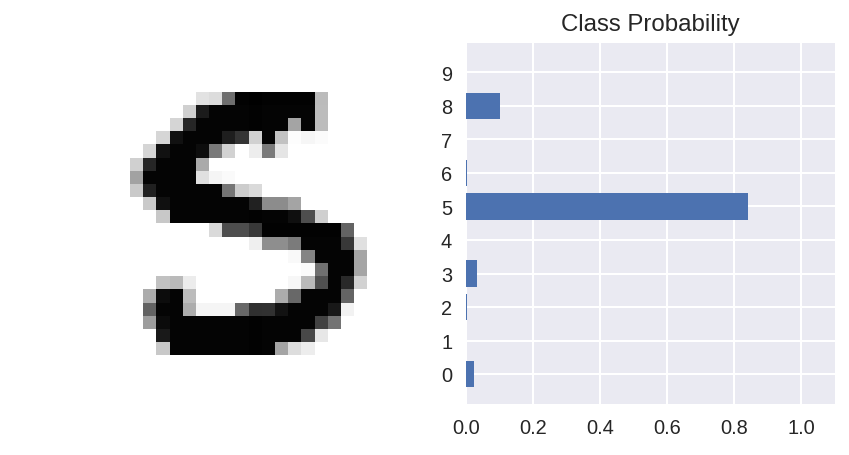

In [0]:
%matplotlib inline
import helper

images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logits = model.forward(img)

# Output of the network are logits, need to take softmax for probabilities
ps = F.softmax(logits, dim=1)
helper.view_classify(img.view(1, 28, 28), ps)